<a href="https://colab.research.google.com/github/phuongtranth/Machine-Learning-Fraudulent-Transaction-Detection/blob/main/ML_Fraudulent_Transaction_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries and data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
raw_data = pd.read_excel('/content/drive/MyDrive/Tran_Thi_Hong_Phuong_ML_final_project/churn_prediction.xlsx')

Mounted at /content/drive


In [ ]:
raw_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


# 1. Exploring the patterns/behavior of churned users

## Data Cleaning

### Handle Missing/ Duplicates values

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Missing values:
- Tenure: replace by its median

- WarehouseToHome: replace by its median

- HourSpendOnApp: replace by its mean

- OrderAmountHikeFromlastYear: New customers with no previous year's data for comparison => replace by 0

- CouponUsed: Customers who haven't used any coupons => replace by 0

- OrderCount:  customers who haven't placed orders => replace by 0

- DaySinceLastOrder: can be converted to its median


In [ ]:
raw_data['Tenure'].fillna(raw_data['Tenure'].median(), inplace=True)
raw_data['WarehouseToHome'].fillna(raw_data['WarehouseToHome'].median(), inplace=True)
raw_data['HourSpendOnApp'].fillna(raw_data['HourSpendOnApp'].mean(), inplace=True)
raw_data['OrderAmountHikeFromlastYear'].fillna(0, inplace=True)
raw_data['CouponUsed'].fillna(0, inplace=True)
raw_data['OrderCount'].fillna(0, inplace=True)
raw_data['DaySinceLastOrder'].fillna(raw_data['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
raw_data['CustomerID'].duplicated().any()

False

No duplications

### Unvariable Analyse

Unique values of CustomerID: 5630
Unique values of Churn: 2
Unique values of Tenure: 36
Unique values of CityTier: 3
Unique values of WarehouseToHome: 34
Unique values of HourSpendOnApp: 7
Unique values of NumberOfDeviceRegistered: 6
Unique values of SatisfactionScore: 5
Unique values of NumberOfAddress: 15
Unique values of Complain: 2
Unique values of OrderAmountHikeFromlastYear: 17
Unique values of CouponUsed: 17
Unique values of OrderCount: 17
Unique values of DaySinceLastOrder: 22
Unique values of CashbackAmount: 2586


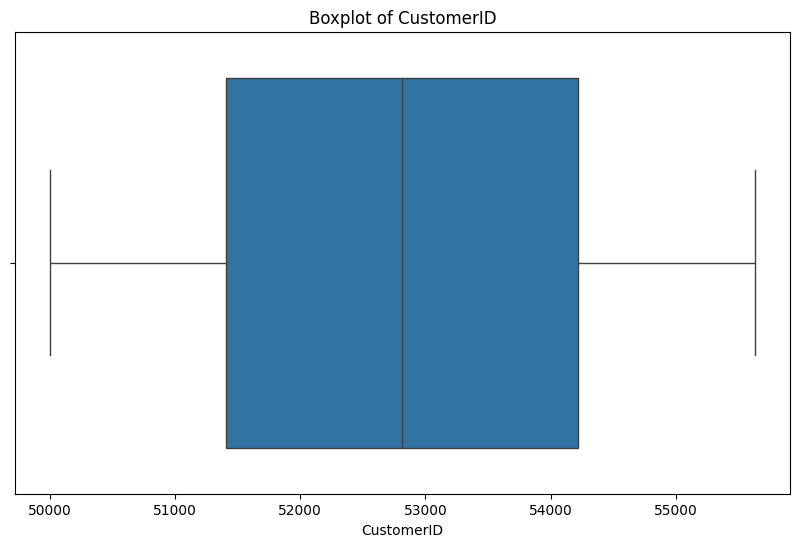

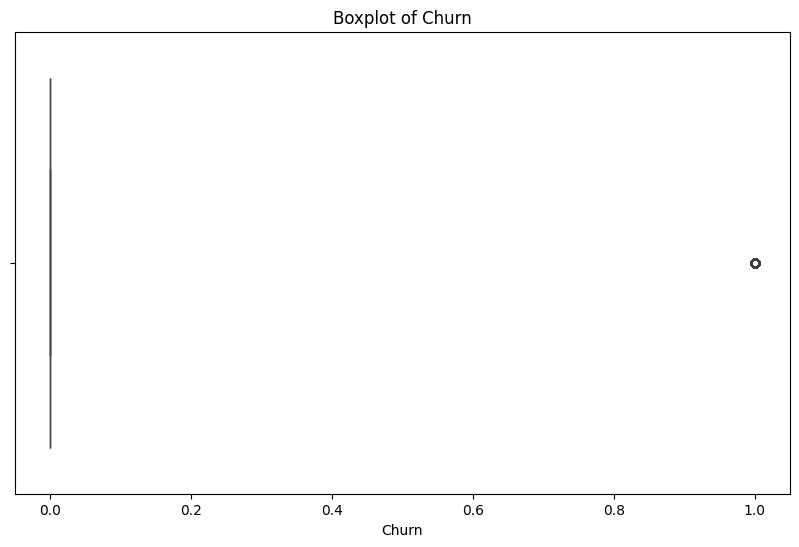

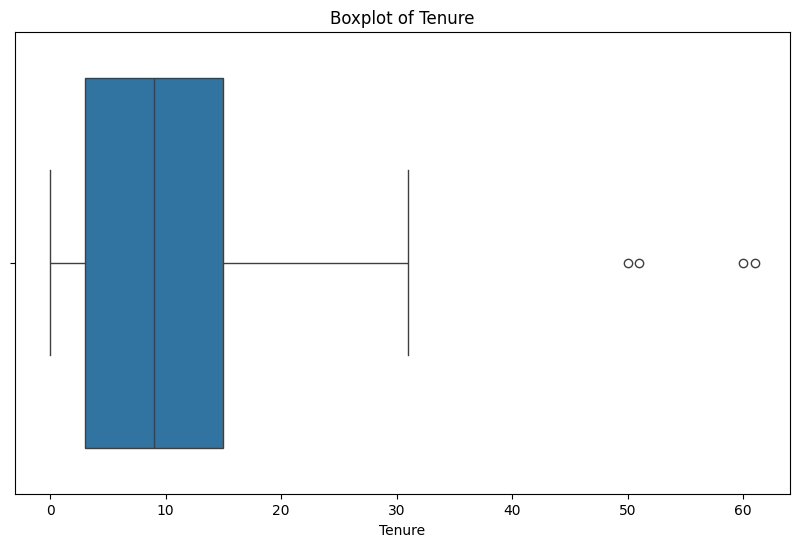

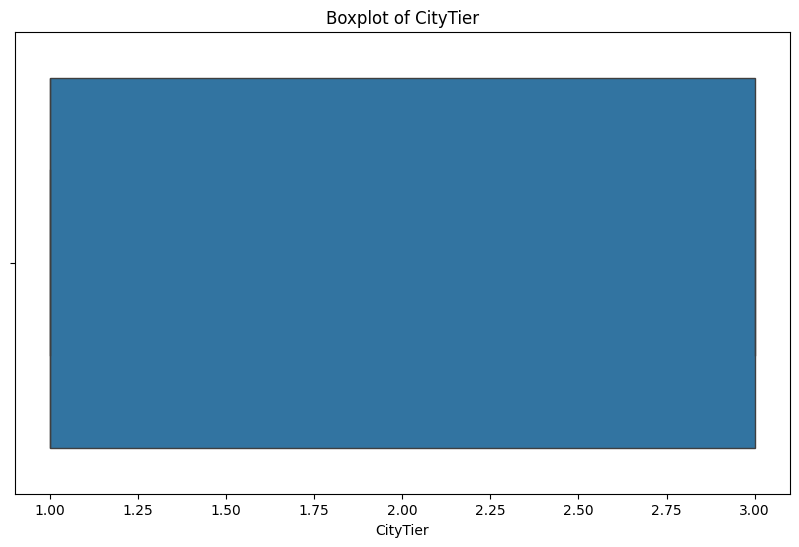

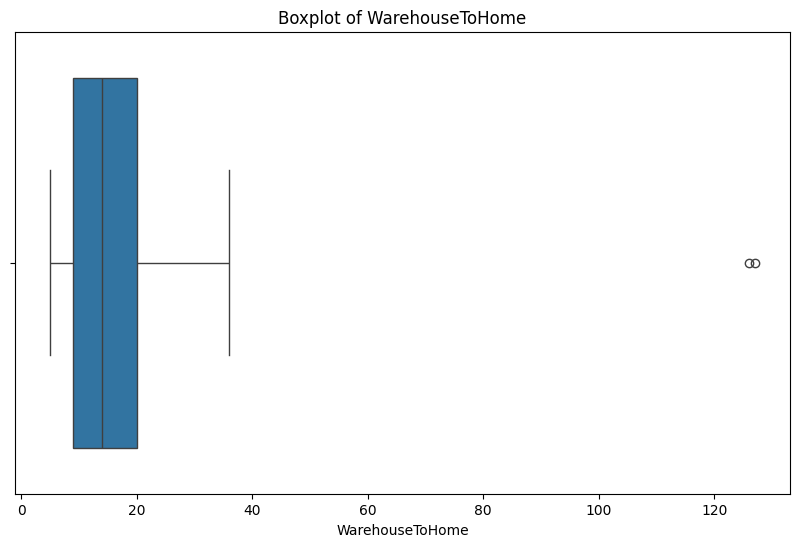

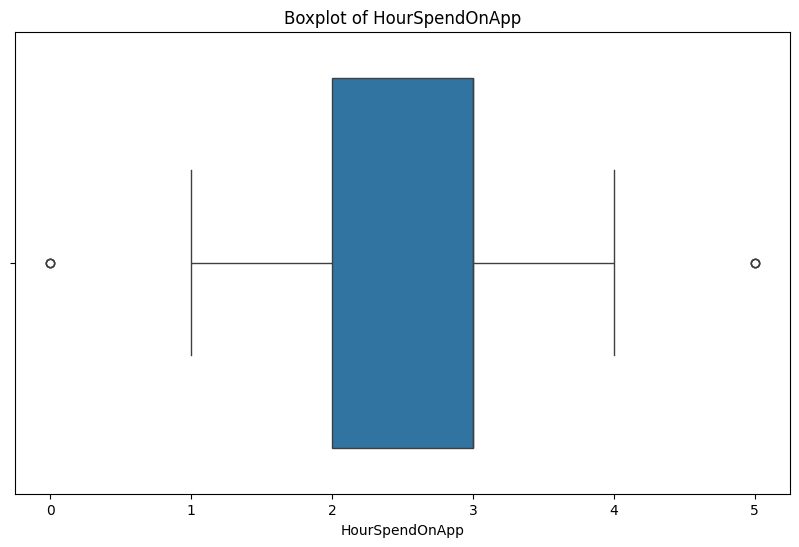

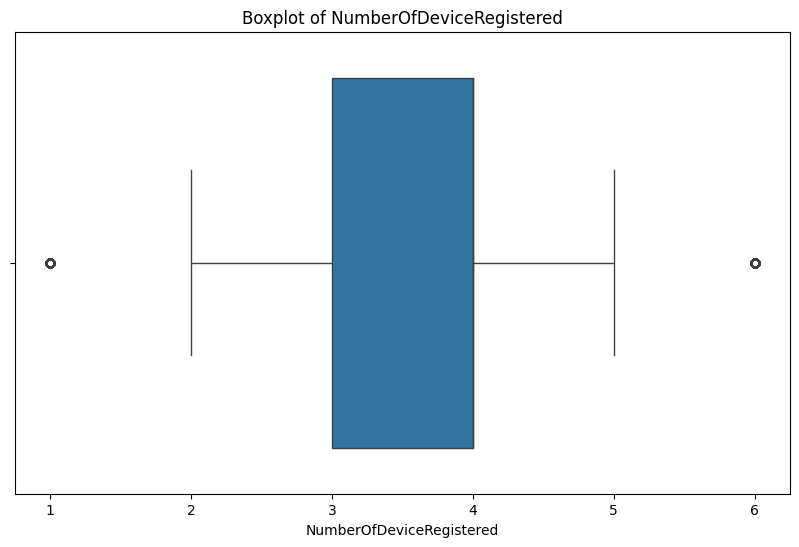

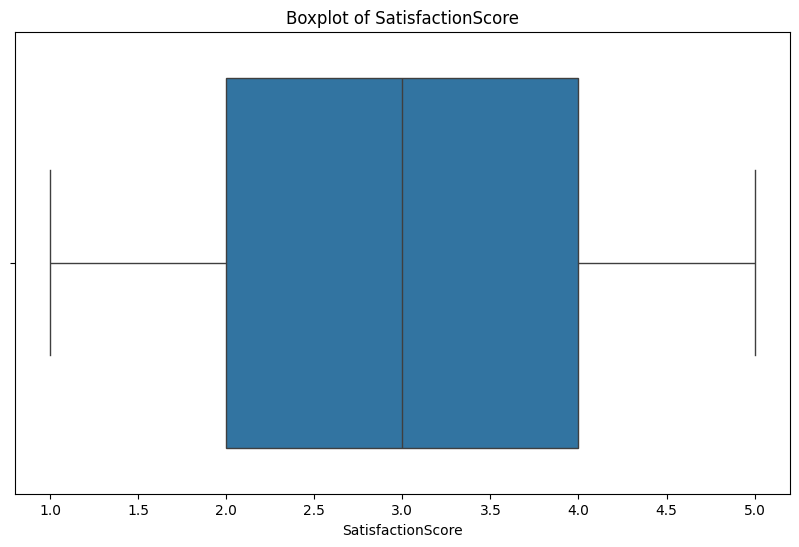

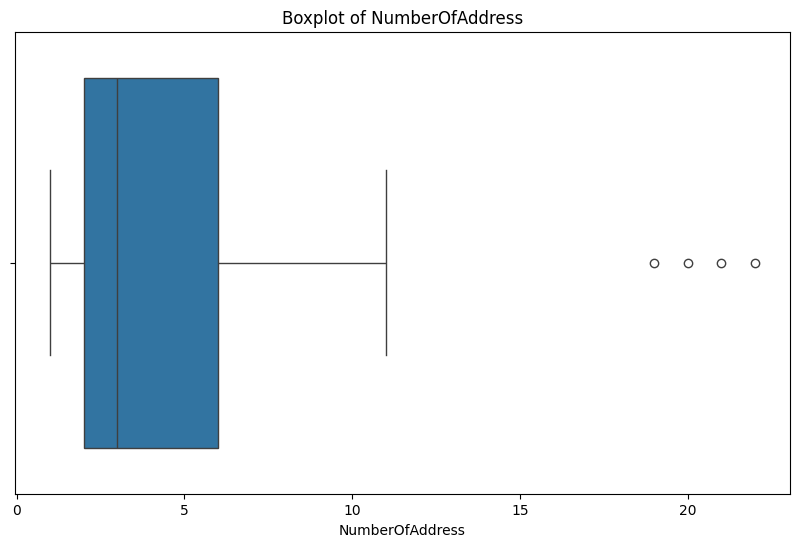

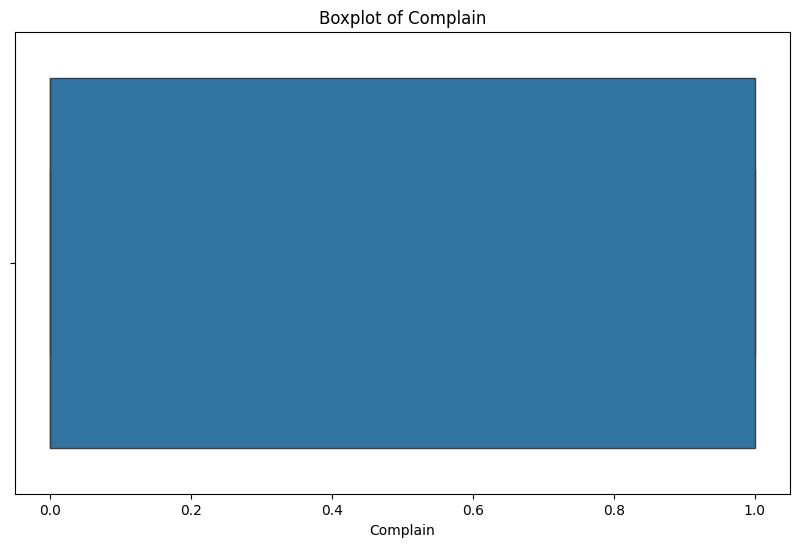

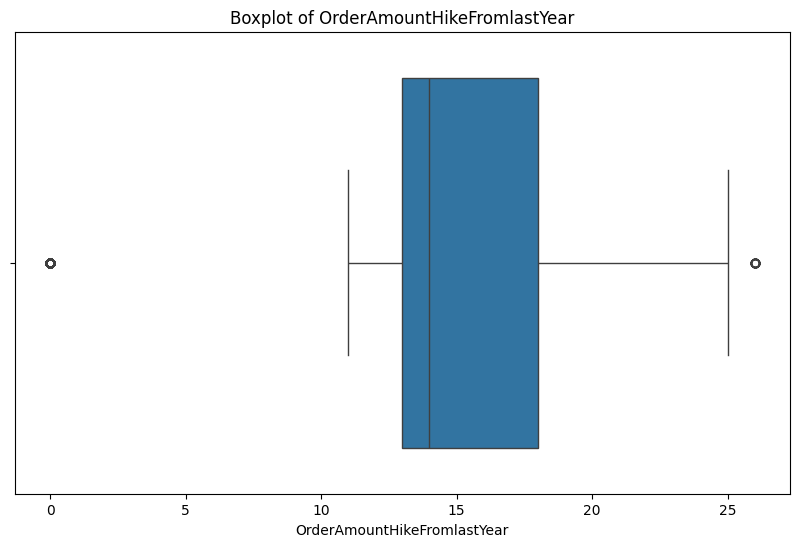

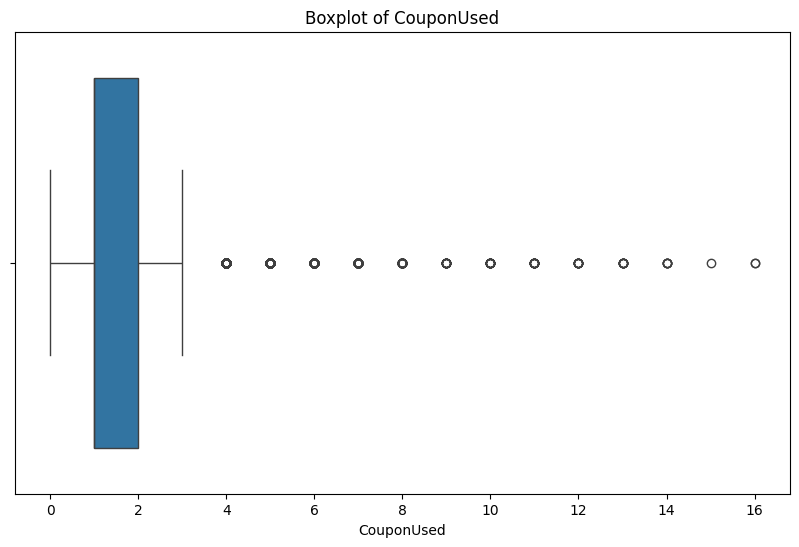

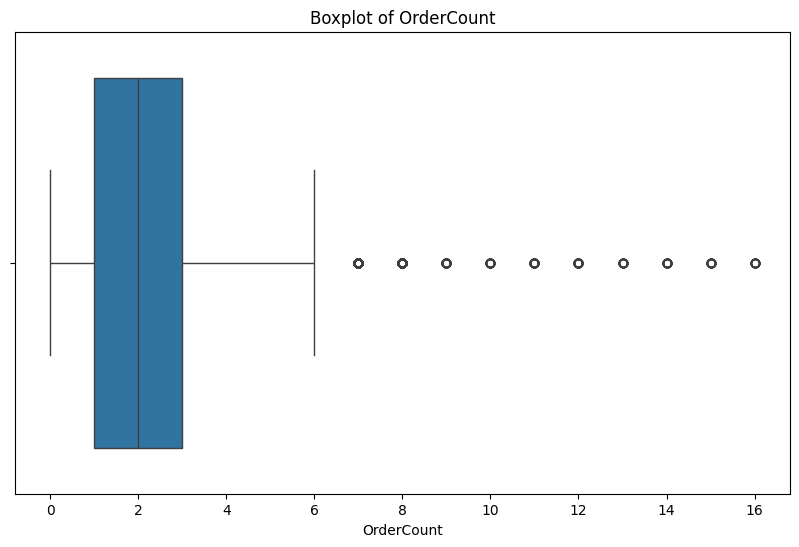

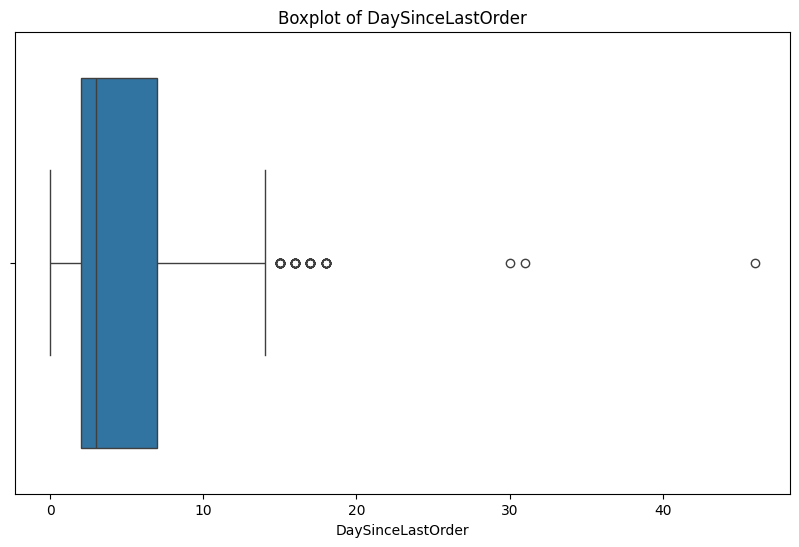

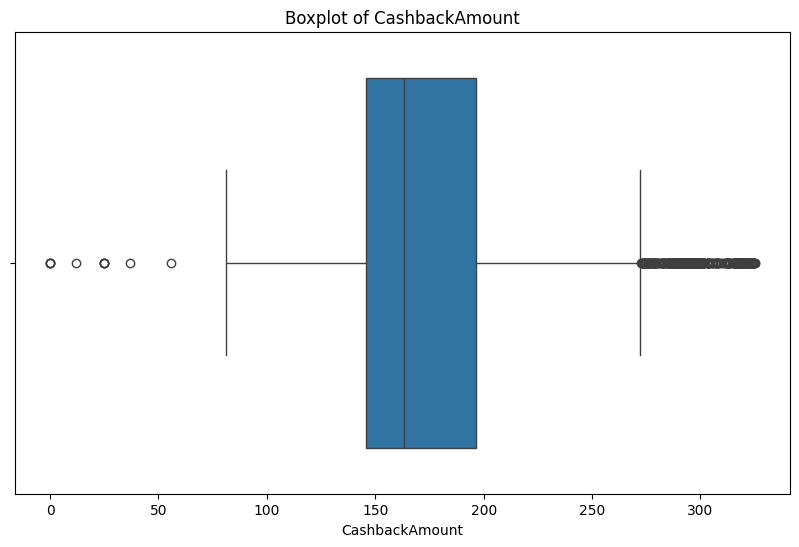

In [ ]:
# Numberic data:

numeric_cols = raw_data.loc[:, raw_data.dtypes != object].columns.tolist()


for col in numeric_cols:
    print(f"Unique values of {col}: {raw_data[col].nunique()}")

for col in numeric_cols:
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    sns.boxplot(x=raw_data[col])
    plt.title(f'Boxplot of {col}')  # Title of the plot
    plt.show()

In [ ]:
raw_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.931535,3.688988,3.066785,4.214032,0.284902,14.968561,1.671403,2.870160,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705384,1.023999,1.380194,2.583586,0.451408,4.893091,1.886648,2.939615,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


- Tenure: right-skewed, most customers clustered in 0 - 20
- WarehouseToHome: majority of customers having short distances (below 40) with some outliers >120
- HourSpendOnApp: centered around 2-3 hours
- NumberOfDeviceRegistered: centered around 3-4 devices
- SatisfactionScore: mean at 3, suggesting generally moderate to positive customer satisfaction levels.
- NumberOfAddress : most customers have 1-5 addresses, several outliers having up to 22 addresses
-OrderAmountHikeFromlastYear: growth in customer spending, centered around 13-18%
- CouponUsed: most customers using 0-2 coupons, some outliers using up to 16
- OrderCount: most customers placing 1-3 orders and several outliers up to 16 orders
- DaySinceLastOrder: Most customers have ordered recently (within 0-10 days)
- CashbackAmount: cashback distribution is complex, cashback distribution is complex, a cluster of high outliers around 300

In [ ]:
# Category data:

cate_cols = raw_data.loc[:, raw_data.dtypes == object].columns.tolist()

for col in cate_cols:
    print(f"Unique values of {col}: {raw_data[col].nunique()}")

Unique values of PreferredLoginDevice: 3
Unique values of PreferredPaymentMode: 7
Unique values of Gender: 2
Unique values of PreferedOrderCat: 6
Unique values of MaritalStatus: 3


### Outliers Detection


Remove the columns that have a few outliers causing the data to be skewed:
- Tenuere: >40
- WarehouseToHome >100
- NumberOfAddress >15
- DaySinceLastOrder >20


In [ ]:
cleaned_data = raw_data[
    (raw_data['Tenure'] <= 40) &
    (raw_data['WarehouseToHome'] <= 100) &
    (raw_data['NumberOfAddress'] <= 15) &
    (raw_data['DaySinceLastOrder'] <= 20)
]

cleaned_data = cleaned_data.reset_index(drop=True)

In [ ]:
# Check rows_removed
len(raw_data) - len(cleaned_data)

13

## Transform features

In [ ]:
cate_columns = cleaned_data.loc[:, cleaned_data.dtypes == object].columns.tolist()

encoded_df = pd.get_dummies(cleaned_data, columns = cate_columns,drop_first=True)
encoded_df.shape

(5617, 31)

In [ ]:
encoded_df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20.0,3,7.0,4.0,4,5,3,0,...,True,False,False,False,False,False,False,False,True,False
1,52942,0,13.0,1,9.0,4.0,4,3,2,0,...,False,False,False,False,False,False,False,False,False,True
2,52972,0,16.0,3,7.0,3.0,4,3,3,0,...,False,False,True,False,True,False,False,False,False,False
3,53125,0,5.0,1,16.0,3.0,4,4,3,0,...,False,False,True,False,False,False,False,False,True,False
4,53367,0,9.0,1,28.0,3.0,4,2,3,1,...,False,False,False,False,True,False,False,False,False,False


## Apply base Random Forest model

In [ ]:
# Split train/test sets
from sklearn.model_selection import train_test_split
X = encoded_df.drop(['Churn','CustomerID'], axis=1)
y = encoded_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(max_depth=2, random_state=0)

clf_rand.fit(X_train_scaled, y_train)

y_ranf_pre_test = clf_rand.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_ranf_pre_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8274


## Show Feature Importance from model

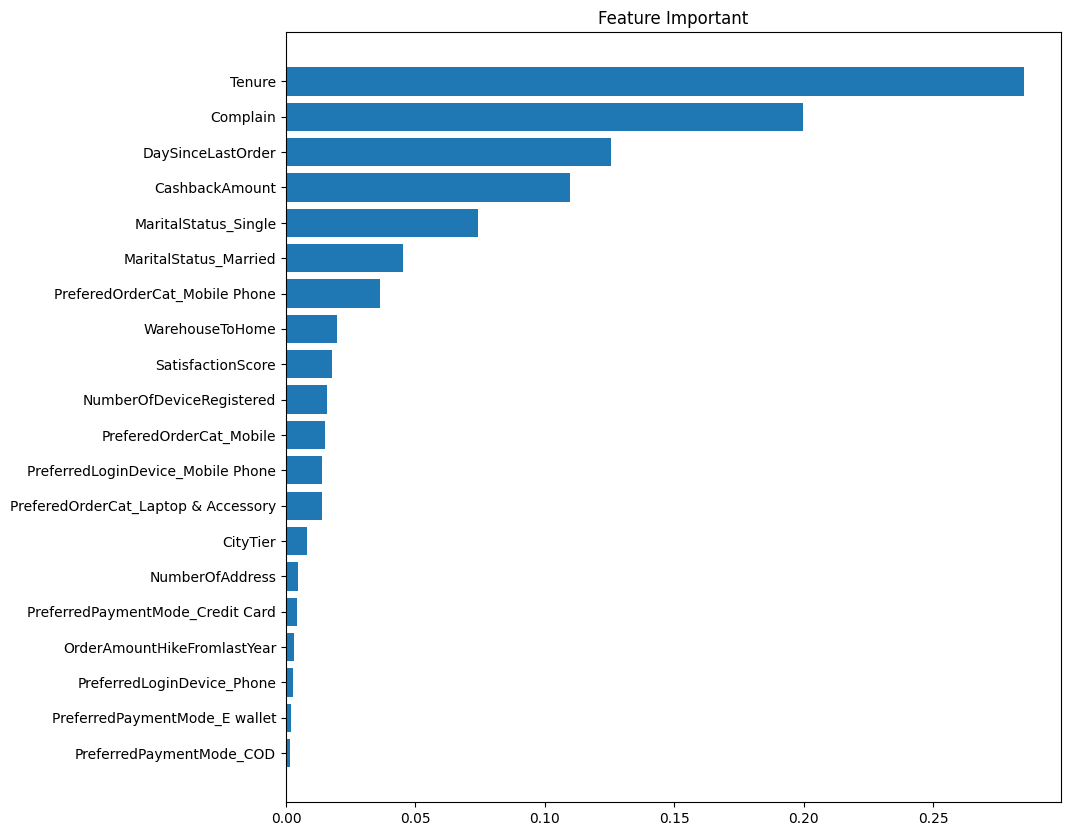

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf_rand.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

 Top 4 features choosed to analyse:

- Tenure

- Complain

- DaySinceLastOrder

- CashbackAmount

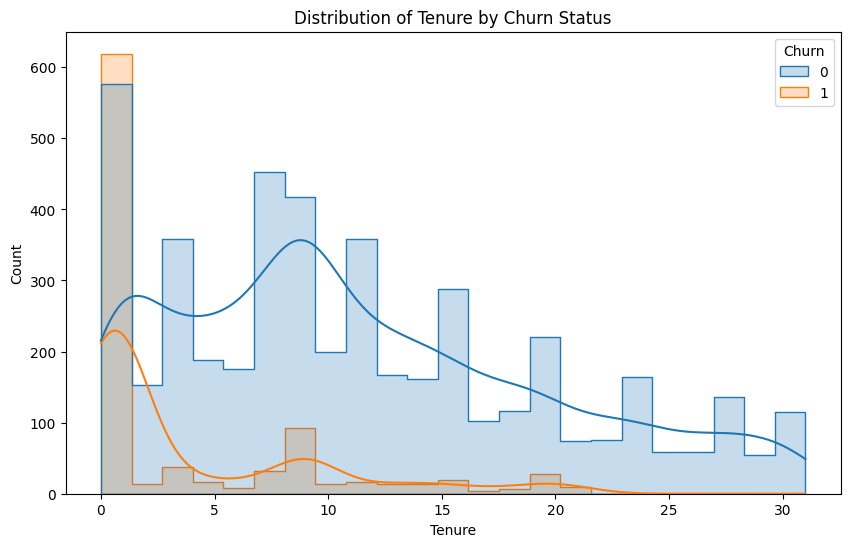


Summary statistics for Tenure:
        count       mean       std  min  25%   50%   75%   max
Churn                                                         
0      4672.0  11.363656  8.166554  0.0  5.0  10.0  17.0  31.0
1       945.0   3.861376  5.480594  0.0  0.0   1.0   7.0  21.0

Correlation between Tenure and Churn: -0.34


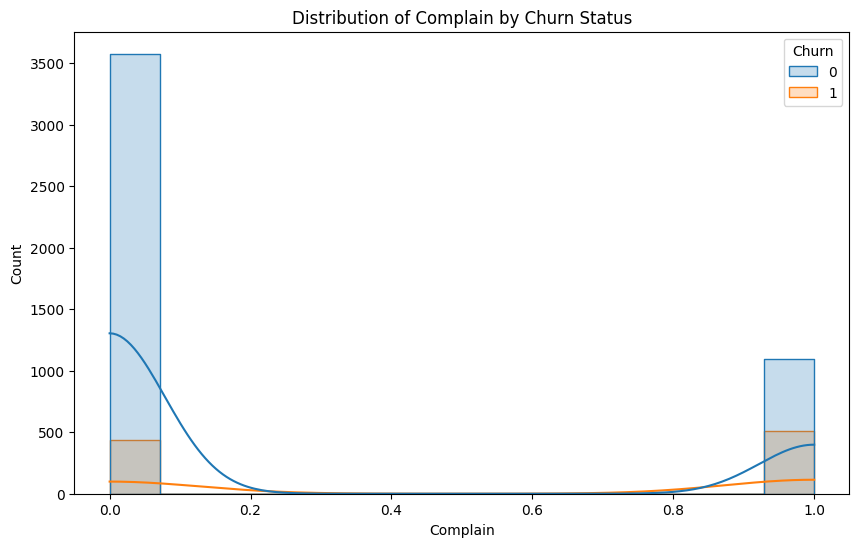


Summary statistics for Complain:
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      4672.0  0.234161  0.423519  0.0  0.0  0.0  0.0  1.0
1       945.0  0.535450  0.499006  0.0  0.0  1.0  1.0  1.0

Correlation between Complain and Churn: 0.25


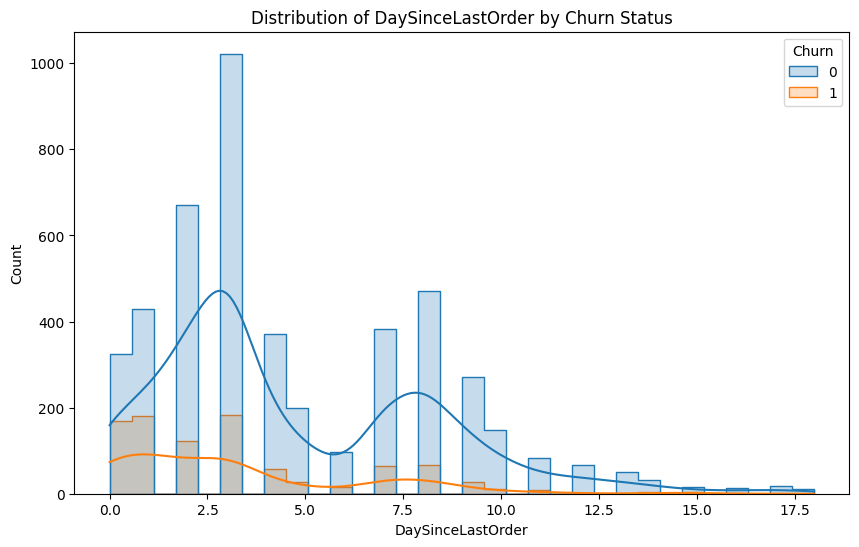


Summary statistics for DaySinceLastOrder:
        count      mean       std  min  25%  50%  75%   max
Churn                                                      
0      4672.0  4.701199  3.528908  0.0  2.0  3.0  8.0  18.0
1       945.0  3.183069  3.013270  0.0  1.0  3.0  4.0  15.0

Correlation between DaySinceLastOrder and Churn: -0.16


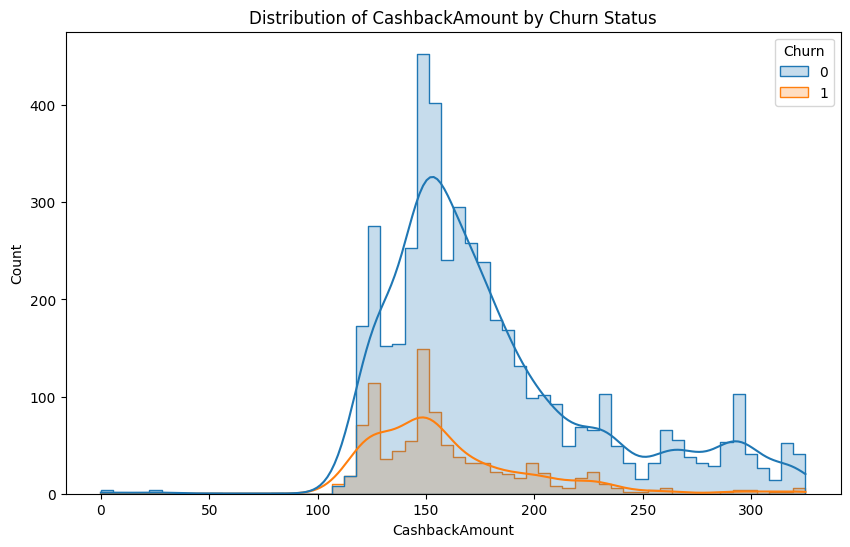


Summary statistics for CashbackAmount:
        count        mean        std     min       25%      50%       75%  \
Churn                                                                       
0      4672.0  180.625890  50.421724    0.00  147.2375  166.115  201.2675   
1       945.0  160.375503  38.446763  110.09  132.0200  149.690  174.6900   

          max  
Churn          
0      324.99  
1      323.59  

Correlation between CashbackAmount and Churn: -0.15


In [ ]:
def plot_distribution(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=encoded_df, x=feature, hue='Churn', kde=True, element='step')
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.show()

# Analyze each important feature
for feature in ['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']:
    plot_distribution(feature)

    # Print summary statistics
    print(f"\nSummary statistics for {feature}:")
    print(encoded_df.groupby('Churn')[feature].describe())

    # Correlation with Churn
    correlation = encoded_df['Churn'].corr(encoded_df[feature])
    print(f"\nCorrelation between {feature} and Churn: {correlation:.2f}")


#2. ML model for predicting churned users (fine tuning)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

columns = ['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

X = encoded_df[columns]
y = encoded_df['Churn']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier()


## Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test_scaled, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test set accuracy:  0.951067615658363


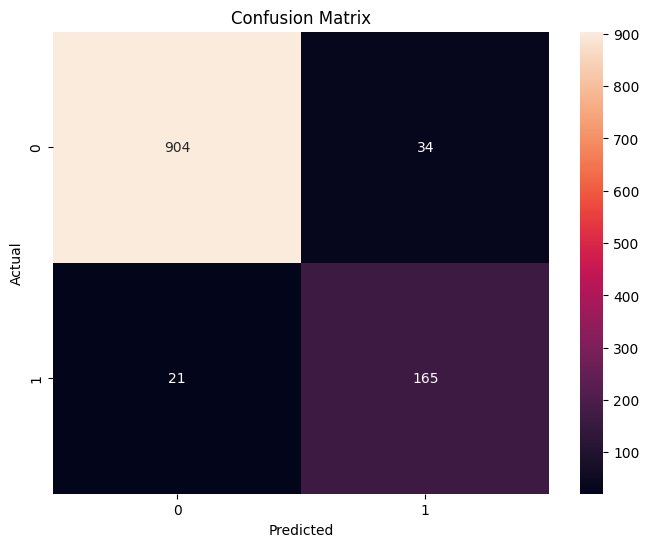

Precision: 0.8291457286432161
Recall: 0.8870967741935484
F1-score: 0.8571428571428571


In [ ]:
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_scaled)
# Confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# 3. ML model for segmenting churned users

## Dimension Reduction

In [ ]:
churn_data = encoded_df[encoded_df['Churn']==1]
columns = ['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']
segmenting_data = churn_data[columns]
segmenting_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 7 to 5584
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure             945 non-null    float64
 1   Complain           945 non-null    int64  
 2   DaySinceLastOrder  945 non-null    float64
 3   CashbackAmount     945 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 36.9 KB


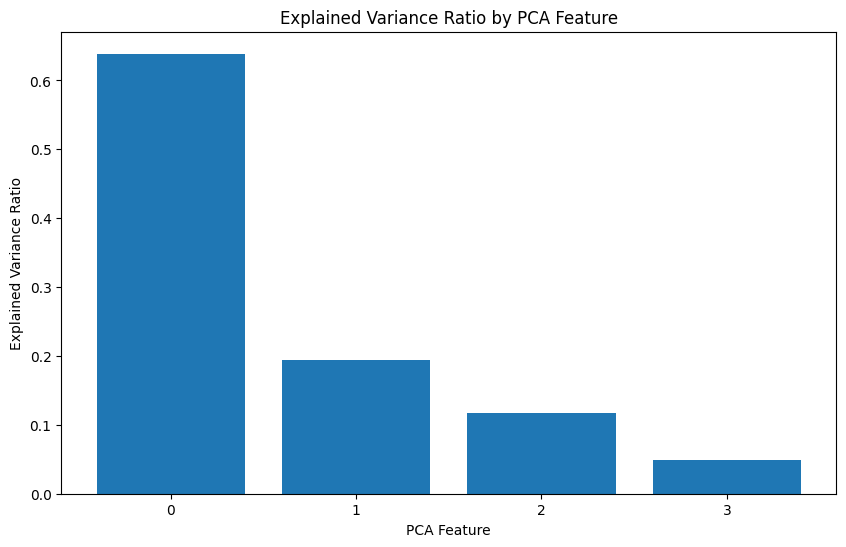

In [ ]:
from sklearn.preprocessing import MinMaxScaler

maxmin_scaler = MinMaxScaler()
X = maxmin_scaler.fit_transform(segmenting_data)

from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(X)

features = range(pca.n_components_)

plt.figure(figsize=(10, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Feature')
plt.title('Explained Variance Ratio by PCA Feature')
plt.show()

i choose 2 fisrt PCA Feature

In [ ]:
df_reduced = pd.DataFrame(pca_data[:, :2], columns=['PC0', 'PC1'])
df_reduced.head()

,PC0,PC1
0,-0.462576,-0.197268
1,-0.462576,-0.197268
2,-0.465663,0.069675
3,-0.465663,0.069675
4,-0.465271,0.003257


## Model Training

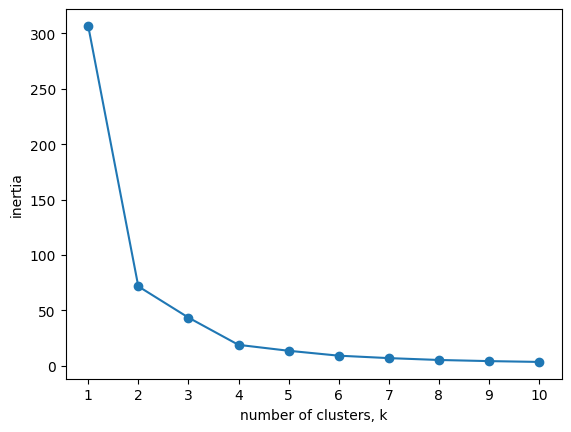

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(1, 11)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_reduced)
    inertias.append(kmeans.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

base on the plot, k should be 4

In [ ]:
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(df_reduced)

# Add cluster labels to the DataFrame
df_reduced['Cluster'] = cluster_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df_reduced.drop('Cluster', axis=1), cluster_labels)
print(f"The average silhouette score is: {silhouette_avg:.3f}")

The average silhouette score is: 0.733


In [ ]:
segmenting_data['Cluster'] = cluster_labels

cluster_means = segmenting_data.groupby('Cluster').mean()
print("Cluster means for original features:")
print(cluster_means)

Cluster means for original features:
            Tenure  Complain  DaySinceLastOrder  CashbackAmount
Cluster                                                        
0         1.731302       0.0           2.659280      152.908116
1         2.044186       1.0           2.881395      151.636930
2        13.371795       0.0           5.166667      200.654872
3        14.500000       1.0           5.342105      203.948158
